<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Modelling%20Time%20Series%20Using%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basics - Modelling Time Series Using Regression**

**Get Dataset**

In [1]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2022-06-10 03:28:01--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.250.98.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2022-06-10 03:28:02 (116 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



**Unzip**

In [2]:
import zipfile
with zipfile.ZipFile("/content/jena_climate_2009_2016.csv.zip", "r") as zip:
  zip.extractall("/content/")

**Load Dataset**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/jena_climate_2009_2016.csv")

In [5]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [6]:
df.tail(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420541,31.12.2016 22:30:00,1000.44,-4.08,269.05,-7.89,74.60,4.51,3.37,1.15,2.10,3.37,1293.55,1.27,2.48,192.1
420542,31.12.2016 22:40:00,1000.45,-4.45,268.68,-7.15,81.30,4.39,3.57,0.82,2.22,3.57,1295.24,0.80,1.44,183.8
420543,31.12.2016 22:50:00,1000.32,-4.09,269.05,-7.23,78.60,4.51,3.54,0.96,2.21,3.54,1293.37,1.25,1.60,199.2
420544,31.12.2016 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.7
420545,31.12.2016 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


**Data Analysis**

Top 4 records don't complet an hour frame so we will exclude it from our model.

In [7]:
df = df[5:]
df.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [8]:
time = pd.to_datetime(df.pop("Date Time"), format="%d.%m.%Y %H:%M:%S")
time

5        2009-01-01 01:00:00
6        2009-01-01 01:10:00
7        2009-01-01 01:20:00
8        2009-01-01 01:30:00
9        2009-01-01 01:40:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, Length: 420546, dtype: datetime64[ns]

In [9]:
series = df["T (degC)"]
series.index = time
series

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 01:10:00   -7.62
2009-01-01 01:20:00   -7.62
2009-01-01 01:30:00   -7.91
2009-01-01 01:40:00   -8.43
                       ... 
2016-12-31 23:20:00   -4.05
2016-12-31 23:30:00   -3.35
2016-12-31 23:40:00   -3.16
2016-12-31 23:50:00   -4.23
2017-01-01 00:00:00   -4.82
Name: T (degC), Length: 420546, dtype: float64

**Null Check**

In [10]:
series.isna().sum()

0

**Feature and Label**

In [11]:
import numpy as np

In [12]:
def split_sequence(sequence, window_size):
    X = []
    y = []
    # for all indexes
    for i in range(len(sequence)):
        end_idx = i + window_size
        # exit condition
        if end_idx > len(sequence) - 1:
            break
        # get X and Y values
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

train = series[:-int(len(series)/10)]
test = series[-int(len(series)/10):]
X_train, y_train = split_sequence(train, window_size=24)
X_test, y_test = split_sequence(test, window_size=24)

In [13]:
print(X_train.shape)
X_train

(378468, 24)


array([[-8.05, -7.62, -7.62, ..., -9.5 , -9.35, -9.47],
       [-7.62, -7.62, -7.91, ..., -9.35, -9.47, -9.63],
       [-7.62, -7.91, -8.43, ..., -9.47, -9.63, -9.67],
       ...,
       [ 2.52,  2.46,  2.33, ...,  2.8 ,  2.84,  2.86],
       [ 2.46,  2.33,  2.29, ...,  2.84,  2.86,  2.81],
       [ 2.33,  2.29,  2.31, ...,  2.86,  2.81,  2.8 ]])

In [14]:
print(y_train.shape)
y_train

(378468,)


array([-9.63, -9.67, -9.68, ...,  2.81,  2.8 ,  2.8 ])

**Ordinary Least Square (OLS) Model**

In [15]:
import statsmodels.api as sm

# train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.748e+07
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:32:04   Log-Likelihood:                 68003.
No. Observations:              378468   AIC:                        -1.360e+05
Df Residuals:                  378443   BIC:                        -1.357e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.000     24.428      0.0

A **Durbin-Watson** *value greater than 2 suggests that our series has no autocorrelation.*

*Checking for normality can be done with the following tests.*

In [16]:
from scipy import stats

# get values of the residuals
residual = result.resid

# run tests and get the p values
print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  0.0
p value of Shapiro-Wilk test is:  0.0
p value of Kolmogorov-Smirnov test is:  0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


*Assuming a significance level of 0.05, all three tests suggest that our series is not normally distributed.*

Test for **Heteroscedasticity**

In [17]:
import statsmodels.stats.api as sms

print('p value of Breusch–Pagan test is: ', sms.het_breuschpagan(result.resid, result.model.exog)[1])
print('p value of White test is: ', sms.het_white(result.resid, result.model.exog)[1])

p value of Breusch–Pagan test is:  0.0
p value of White test is:  0.0


*Assuming a significance level of 0.05, the two tests suggest that our series is heteroscedastic.*

*Our series is neither homoscedastic nor normally distributed. Lucky for us, unlike OLS, GLS accounts for these residual errors.*

**Generalized Least Squares (GLS) Model**

In [18]:
import statsmodels.api as sm

# train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
model = sm.GLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            GLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.748e+07
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:37:51   Log-Likelihood:                 68003.
No. Observations:              378468   AIC:                        -1.360e+05
Df Residuals:                  378443   BIC:                        -1.357e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.000     24.428      0.0

**Predictions**

In [23]:
X_test = sm.add_constant(X_test)

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)

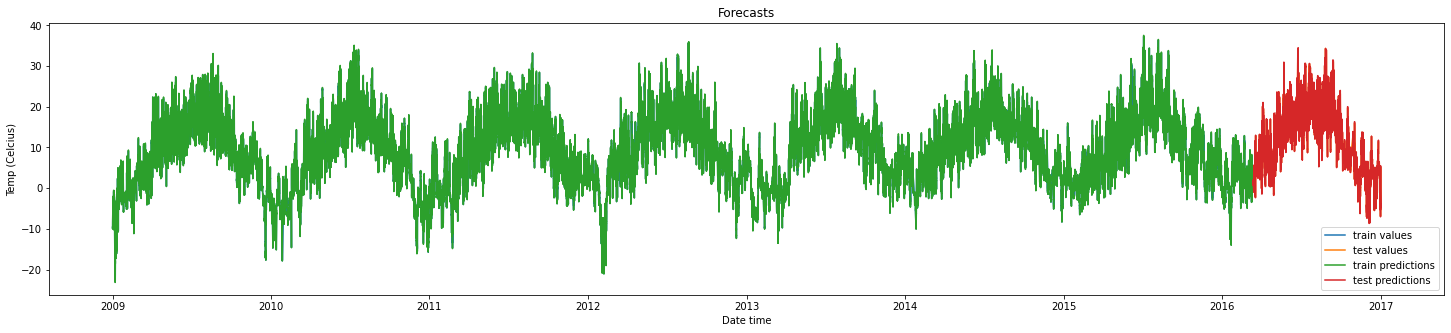

In [26]:
from matplotlib import pyplot as plt

# indexes start from 24 due to the window size we chose
plt.figure(figsize=(25, 5))
plt.plot(pd.Series(y_train, index=train[24:].index), label='train values')
plt.plot(pd.Series(y_test, index=test[24:].index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train[24:].index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test[24:].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (Celcius)')
plt.title('Forecasts')
plt.legend()
plt.show()